## Check Missing Values

In [12]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"D:\Make_my_trip\previous_ds\2.csv")

# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])


pickupLocation      36779
dropoffLocation     36779
carType             36779
rentalAgency        36779
rentalDuration      36779
totalDistance       36779
fuelPolicy          36779
bookingStatus       36779
total_rent_price    36779
dtype: int64


encoding the categorical variables:

In [13]:
from sklearn.preprocessing import LabelEncoder

# Columns to label encode
categorical_columns = ['pickupLocation', 'dropoffLocation', 'rentalAgency', 'fuelPolicy', 'bookingStatus']

# Initialize LabelEncoder
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string in case of NaNs
    label_encoders[col] = le  # Store encoder for future use (e.g., inverse transform)

# Display encoded values for verification
df[categorical_columns].head()


,pickupLocation,dropoffLocation,rentalAgency,fuelPolicy,bookingStatus
0,3491,3485,5,3,3
1,3491,3485,5,3,3
2,3491,3485,5,3,3
3,3491,3485,5,3,3
4,3491,3485,5,3,3


handling the missing values

In [14]:
# Handling missing values

# Fill categorical missing values with 'No Car Booked'
categorical_cols = ['carType', 'rentalAgency', 'fuelPolicy', 'bookingStatus']
df[categorical_cols] = df[categorical_cols].fillna('No Car Booked')

# Fill numerical missing values with the median
numerical_cols = ['rentalDuration', 'totalDistance', 'total_rent_price']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# Verify if missing values are handled
print(df.isnull().sum())


travelCode          0
user_id             0
departure           0
arrival             0
flightType          0
flight_price        0
flight_duration     0
distance            0
agency              0
flight_date         0
hotel_name          0
hotel_place         0
days                0
hotel_base          0
total_hotel         0
check_in            0
company             0
user_name           0
gender              0
age                 0
pickupLocation      0
dropoffLocation     0
carType             0
rentalAgency        0
rentalDuration      0
totalDistance       0
fuelPolicy          0
bookingStatus       0
total_rent_price    0
total_price         0
dtype: int64


## Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_cols = ['departure', 'arrival', 'flightType', 'agency', 'hotel_name',
                    'hotel_place', 'company', 'user_name', 'gender', 'pickupLocation',
                    'dropoffLocation', 'carType', 'rentalAgency', 'fuelPolicy', 'bookingStatus']

# Apply Label Encoding
label_encoders = {}  # Dictionary to store encoders

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for future use

# Display a sample of the encoded dataset
print(df.head())


   travelCode  user_id  departure  arrival  flightType  flight_price  \
0           0        0          5        3           1       1434.38   
1           2        0          0        7           1       1684.05   
2           7        0          0        7           0        964.83   
3          11        0          1        7           2       1268.97   
4          13        0          5        3           1       1434.38   

   flight_duration  distance  agency flight_date  ...  pickupLocation  \
0             1.76    676.53       1  09/26/2019  ...            3491   
1             2.16    830.86       0  10-10-2019  ...            3491   
2             2.16    830.86       0  11/14/2019  ...            3491   
3             1.76    676.56       2  12-12-2019  ...            3491   
4             1.76    676.53       1  12/26/2019  ...            3491   

   dropoffLocation  carType  rentalAgency  rentalDuration totalDistance  \
0             3485        2             5            

## Feature Selection

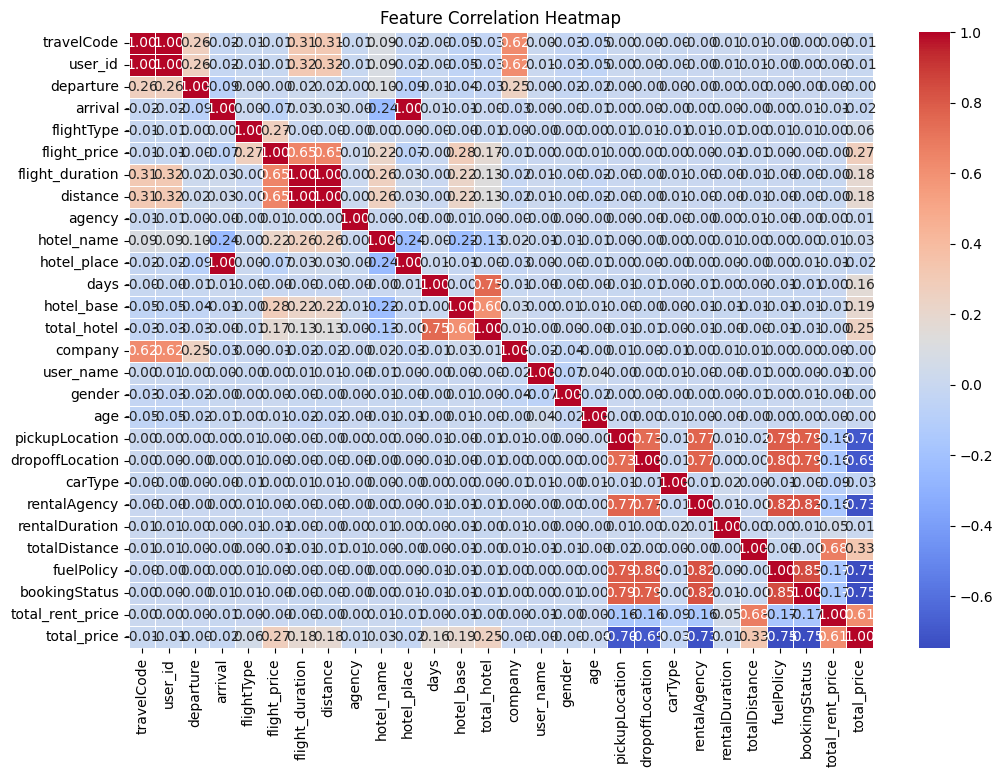

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [22]:
df.columns

Index(['travelCode', 'user_id', 'departure', 'arrival', 'flightType',
       'flight_price', 'flight_duration', 'distance', 'agency', 'hotel_name',
       'hotel_place', 'days', 'hotel_base', 'total_hotel', 'check_in',
       'company', 'user_name', 'gender', 'age', 'pickupLocation',
       'dropoffLocation', 'carType', 'rentalAgency', 'rentalDuration',
       'totalDistance', 'fuelPolicy', 'bookingStatus', 'total_rent_price',
       'total_price'],
      dtype='object')

In [25]:
# Compute correlation matrix using only numeric columns
corr_matrix = df.select_dtypes(include=['number']).corr()

# Get correlation with 'total_rent_price'
target_corr = corr_matrix["total_rent_price"].sort_values(ascending=False)

# Filter features with strong correlation (above 0.5 or below -0.5)
strong_corr_features = target_corr[abs(target_corr) > 0.5]

# Display strongly correlated features
print(strong_corr_features)


total_rent_price    1.000000
totalDistance       0.675436
total_price         0.611777
Name: total_rent_price, dtype: float64


Features correlated with total_rent_price:
 total_rent_price    1.000000
totalDistance       0.675436
total_price         0.611777
rentalDuration      0.047946
hotel_name          0.005125
travelCode          0.004054
user_id             0.004007
agency              0.003724
departure           0.003314
flightType          0.002622
days                0.001193
company             0.001015
age                 0.000162
flight_price       -0.002896
distance           -0.003771
flight_duration    -0.003787
gender             -0.004095
total_hotel        -0.004779
hotel_place        -0.005219
arrival            -0.005219
user_name          -0.005579
hotel_base         -0.009548
carType            -0.086566
dropoffLocation    -0.155294
pickupLocation     -0.160455
rentalAgency       -0.160924
bookingStatus      -0.167040
fuelPolicy         -0.167470
Name: total_rent_price, dtype: float64

Features correlated with total_price:
 total_price         1.000000
total_rent_price    0.611777
totalDi

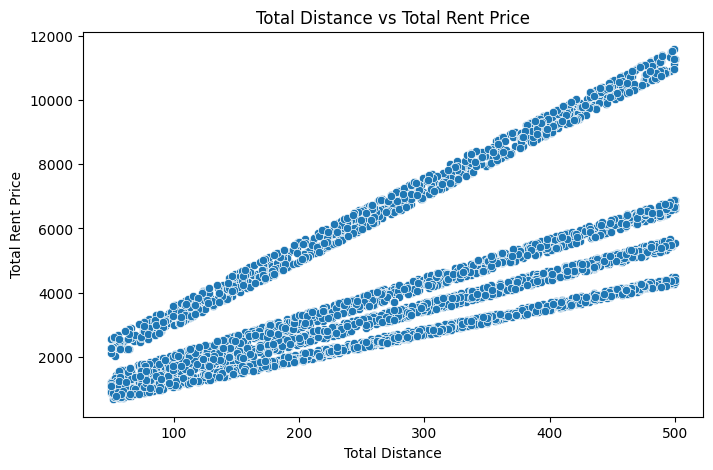

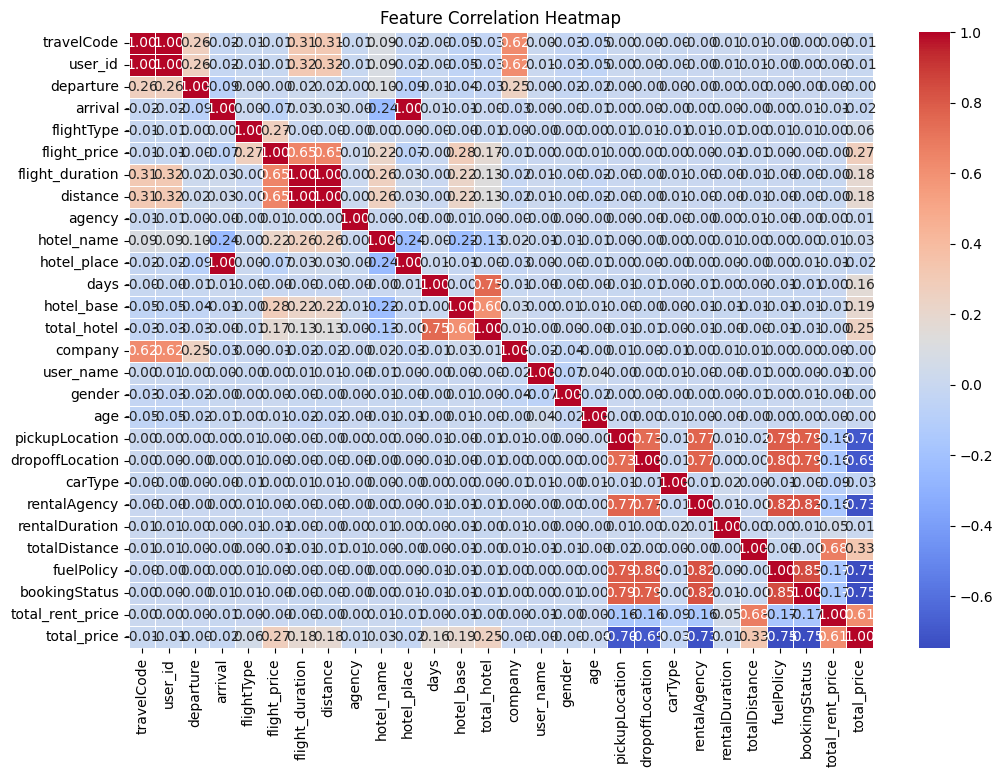

In [26]:
# Compute correlation matrix for numerical features
corr_matrix = df.select_dtypes(include=['number']).corr()

# Analyze correlation of 'total_rent_price' with other features
rent_price_corr = corr_matrix["total_rent_price"].sort_values(ascending=False)
print("Features correlated with total_rent_price:\n", rent_price_corr)

# Analyze correlation of 'total_price' with other features
total_price_corr = corr_matrix["total_price"].sort_values(ascending=False)
print("\nFeatures correlated with total_price:\n", total_price_corr)

# Visualize the relationship between total_rent_price and totalDistance
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['totalDistance'], y=df['total_rent_price'])
plt.xlabel("Total Distance")
plt.ylabel("Total Rent Price")
plt.title("Total Distance vs Total Rent Price")
plt.show()

# Heatmap of top correlated features
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [71]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Load dataset
df = pd.read_csv("D:/Make_my_trip/previous_ds/2.csv")

# Verify column names
# print("Columns in dataset:", df.columns)

# 🔹 Debug: Check unique booking status values
# print("Unique Booking Status Values:", df['bookingStatus'].unique())

# Convert necessary columns to correct data types
df['user_id'] = df['user_id'].astype(np.int32)
df['travelCode'] = df['travelCode'].astype(str)

# 🔹 Fix: Adjust bookingStatus mapping ('Confirmed' → 1)
df['bookingStatus'] = df['bookingStatus'].map({'Confirmed': 1, 'Pending': 0, 'Cancelled': 0}).astype(np.float32)
# print("Updated Booking Status Counts:\n", df['bookingStatus'].value_counts())

# Select relevant features
features = ['totalDistance', 'rentalDuration', 'flight_price', 'flight_duration', 'days']

# Drop rows with missing values
df_filtered = df.dropna(subset=features).copy()

# 🔹 Fix FutureWarning: Convert to float32 before scaling
df_filtered.loc[:, features] = df_filtered[features].astype(np.float32).values

# Standardize features
scaler = StandardScaler()
df_filtered.loc[:, features] = df_filtered[features].astype(np.float32).values  # Convert to float32 before scaling
df_filtered[features] = scaler.fit_transform(df_filtered[features].astype(np.float32)).astype(np.float32)

# Create user feature mapping
user_features = df_filtered.groupby('user_id')[features].mean()

# Convert to NumPy array
user_features_np = user_features.to_numpy()

# Train Nearest Neighbors model
model = NearestNeighbors(metric='euclidean', algorithm='auto', n_neighbors=5)
model.fit(user_features_np)

# Function to recommend car types
def recommend_cars(user_id, df, user_features, model, top_n=5):
    if user_id not in user_features.index:
        return "User not found in dataset."

    user_index = user_features.index.get_loc(user_id)
    distances, indices = model.kneighbors([user_features_np[user_index]])

    similar_users = user_features.iloc[indices[0][1:]].index

    # 🔹 Check if any similar users booked a car
    booked_cars = df[(df['user_id'].isin(similar_users)) & (df['bookingStatus'] == 1)]['carType'].unique()

    if booked_cars.size == 0:
        return "⚠️ No similar users have booked a car."

    return booked_cars[:top_n]

# Debug: Check if any users booked a car
# print("Updated Unique Car Types Booked:", df[df['bookingStatus'] == 1]['carType'].unique())

# Recommend cars
user_id = 1  # Change as needed ### 1 user id not there in the dataset.
recommended_cars = recommend_cars(user_id, df, user_features, model, top_n=5)
print("Recommended Car Types for User:", recommended_cars)


Recommended Car Types for User: User not found in dataset.


below code is to check if 1 user_id is there in the dataframe _filtered.

In [50]:
print(f"Unique user IDs: {df['user_id'].unique()[:30]}")  # Display first 10 unique user IDs
print(f"User ID in dataset? {user_id in df['user_id'].values}")  # True/False


Unique user IDs: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
User ID in dataset? True


In [ ]:
df['user_id'] = df['user_id'].astype(int)

check id 1 user-id is there in the df_filtered.

In [64]:
print("Unique user IDs in df_filtered:", df_filtered['user_id'].unique())


Unique user IDs in df_filtered: [   0    2    3 ... 1335 1337 1339]


In [58]:
print("Unique user IDs in user_features:", user_features.index)


Unique user IDs in user_features: Index([   0,    2,    3,    4,    6,    7,    8,    9,   10,   11,
       ...
       1323, 1324, 1325, 1327, 1330, 1331, 1332, 1335, 1337, 1339],
      dtype='int32', name='user_id', length=1099)


In [63]:
print("Unique user IDs in user_features:", user_features.index)


Unique user IDs in user_features: Index([   0,    2,    3,    4,    6,    7,    8,    9,   10,   11,
       ...
       1323, 1324, 1325, 1327, 1330, 1331, 1332, 1335, 1337, 1339],
      dtype='int32', name='user_id', length=1099)


In [65]:
print(df['user_id'].unique())


[   0    1    2 ... 1337 1338 1339]


Try these steps to preserve user_id = 1 in the dataset:

In [66]:
print(df[df['user_id'] == 1][features].isna().sum())


totalDistance      2
rentalDuration     2
flight_price       0
flight_duration    0
days               0
dtype: int64


In [67]:
df[features] = df[features].fillna(df[features].median())  # Fill NaNs with median values


In [68]:
df_filtered = df.dropna(subset=features).copy()
df_filtered.loc[:, features] = df_filtered[features].astype(np.float32).values  # Ensure float32 type
scaler = StandardScaler()
df_filtered[features] = scaler.fit_transform(df_filtered[features]).astype(np.float32)


In [69]:
print("Unique user IDs in df_filtered:", df_filtered['user_id'].unique())


Unique user IDs in df_filtered: [   0    1    2 ... 1337 1338 1339]


In [70]:
recommended_cars = recommend_cars(1, df, user_features, model, top_n=5)
print("Recommended Car Types for User:", recommended_cars)


Recommended Car Types for User: User not found in dataset.


In [72]:
if 1 not in user_features.index:
    user_features.loc[1] = df[df['user_id'] == 1][features].mean()


C:\Users\hetvi\AppData\Local\Temp\ipykernel_14140\2832605517.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  user_features.loc[1] = df[df['user_id'] == 1][features].mean()


In [73]:
recommended_cars = recommend_cars(1, df, user_features, model, top_n=5)
print("Recommended Car Types for User:", recommended_cars)


IndexError: index 1099 is out of bounds for axis 0 with size 1099

final code:✔️✔️✔️✔️

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Load dataset
df = pd.read_csv("D:/Make_my_trip/previous_ds/2.csv")

# Convert necessary columns to correct data types
df['user_id'] = df['user_id'].astype(np.int32)
df['travelCode'] = df['travelCode'].astype(str)

# 🔹 Fix: Adjust bookingStatus mapping ('Confirmed' → 1, others → 0)
df['bookingStatus'] = df['bookingStatus'].map({'Confirmed': 1, 'Pending': 0, 'Cancelled': 0}).astype(np.float32)

# Select relevant features
features = ['totalDistance', 'rentalDuration', 'flight_price', 'flight_duration', 'days']

# Drop rows with missing values
df_filtered = df.copy()
df_filtered[features] = df_filtered[features].fillna(df_filtered[features].median())

# 🔹 Fix FutureWarning: Convert to float32 before scaling
df_filtered.loc[:, features] = df_filtered[features].astype(np.float32).values

# Standardize features
scaler = StandardScaler()
df_filtered[features] = df_filtered[features].astype(np.float32)
df_filtered[features] = scaler.fit_transform(df_filtered[features])

# debugging stmt
# print("Is user_id=1 in df_filtered?", 1 in df_filtered['user_id'].unique())

# Create user feature mapping
user_features = df_filtered.groupby('user_id')[features].mean()

# Convert to NumPy array while preserving index order
user_features_np = user_features.to_numpy()

# Train Nearest Neighbors model
model = NearestNeighbors(metric='euclidean', algorithm='auto', n_neighbors=5)
model.fit(user_features_np)

# Function to recommend car types
def recommend_cars(user_id, df, user_features, model, top_n=5):
    if user_id not in user_features.index:
        return f"⚠️ User {user_id} not found in dataset!"

    user_index = np.where(user_features.index == user_id)[0]
    
    if len(user_index) == 0:
        return f"⚠️ User {user_id} not found in user_features!"

    # Get similar users
    distances, indices = model.kneighbors([user_features_np[user_index[0]]])

    similar_users = user_features.iloc[indices[0][1:]].index

    # 🔹 Check if any similar users booked a car
    booked_cars = df[(df['user_id'].isin(similar_users)) & (df['bookingStatus'] == 1)]['carType'].unique()

    if booked_cars.size == 0:
        return "⚠️ No similar users have booked a car."

    return booked_cars[:top_n]

# 🔍 Debugging: Ensure user exists
# print("Unique user IDs in dataset:", df['user_id'].unique())
# print("Unique user IDs in user_features:", user_features.index.unique())

# Recommend cars
user_id = 123  # Change as needed
recommended_cars = recommend_cars(user_id, df, user_features, model, top_n=5)
print("Recommended Car Types for User:", recommended_cars)


Recommended Car Types for User: ['Hatchback' 'Luxury' 'SUV']


!!!

In [2]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Function to evaluate recommendations
def evaluate_recommendations(df, user_features, model, top_n=5):
    y_true = []  # Actual booked cars (1 for booked, 0 for not booked)
    y_pred = []  # Recommended cars (1 for recommended, 0 for not recommended)

    for user_id in df['user_id'].unique():
        # Get actual cars booked by the user
        booked_cars = df[(df['user_id'] == user_id) & (df['bookingStatus'] == 1)]['carType'].unique()

        # Get recommended cars for the user
        recommended_cars = recommend_cars(user_id, df, user_features, model, top_n)

        if isinstance(recommended_cars, str):
            continue  # Skip if no recommendations found

        # Create binary list of true and predicted cars
        y_true_user = [1 if car in booked_cars else 0 for car in recommended_cars]
        y_pred_user = [1] * len(recommended_cars)

        # Append results
        y_true.extend(y_true_user)
        y_pred.extend(y_pred_user)

    # Calculate precision, recall, and accuracy
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)

    return precision, recall, accuracy

# Evaluate recommendations
precision, recall, accuracy = evaluate_recommendations(df, user_features, model, top_n=5)

# Output evaluation results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Accuracy: {accuracy:.2f}")


Precision: 0.24
Recall: 1.00
Accuracy: 0.24


!!!!

In [81]:
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV

# Function to tune hyperparameters and improve model
def tune_model(user_features_np):
    # Set up parameter grid for tuning the NearestNeighbors model
    param_grid = {
        'n_neighbors': [3, 5, 10, 15],  # Test different k values
        'metric': ['euclidean', 'manhattan'],  # Removed 'cosine' as it's not compatible with all algorithms
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Test different algorithms
    }

    model = NearestNeighbors()

    # Grid Search for hyperparameter tuning
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(user_features_np)

    # Best parameters and model
    print("Best Parameters:", grid_search.best_params_)
    return grid_search.best_estimator_

# Re-train the model with tuned hyperparameters
model = tune_model(user_features_np)

# Evaluate recommendations with the updated model
def evaluate_recommendations_improved(df, user_features, model, top_n=5):
    y_true = []  # Actual booked cars (1 for booked, 0 for not booked)
    y_pred = []  # Recommended cars (1 for recommended, 0 for not recommended)

    for user_id in df['user_id'].unique():
        # Get actual cars booked by the user
        booked_cars = df[(df['user_id'] == user_id) & (df['bookingStatus'] == 1)]['carType'].unique()

        # Get recommended cars for the user using the updated model
        recommended_cars = recommend_cars(user_id, df, user_features, model, top_n)

        if isinstance(recommended_cars, str):
            continue  # Skip if no recommendations found

        # Create binary list of true and predicted cars
        y_true_user = [1 if car in booked_cars else 0 for car in recommended_cars]
        y_pred_user = [1] * len(recommended_cars)

        # Append results
        y_true.extend(y_true_user)
        y_pred.extend(y_pred_user)

    # Calculate precision, recall, and accuracy
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)

    return precision, recall, accuracy

# Evaluate the updated recommendation system
precision, recall, accuracy = evaluate_recommendations_improved(df, user_features, model, top_n=5)

# Output evaluation results
print(f"Improved Precision: {precision:.2f}")
print(f"Improved Recall: {recall:.2f}")
print(f"Improved Accuracy: {accuracy:.2f}")


d:\Make_my_trip\Recommendation\recomm\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Parameters: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 3}
Improved Precision: 0.26
Improved Recall: 1.00
Improved Accuracy: 0.26


other meausres ✔️

In [4]:
from sklearn.metrics import f1_score, roc_auc_score

# Calculate F1-Score and AUC instead of precision, recall, and accuracy
def evaluate_recommendations_improved_v2(df, user_features, model, top_n=5):
    y_true = []  # Actual booked cars (1 for booked, 0 for not booked)
    y_pred = []  # Recommended cars (1 for recommended, 0 for not recommended)

    for user_id in df['user_id'].unique():
        booked_cars = df[(df['user_id'] == user_id) & (df['bookingStatus'] == 1)]['carType'].unique()
        recommended_cars = recommend_cars(user_id, df, user_features, model, top_n)

        if isinstance(recommended_cars, str):
            continue  # Skip if no recommendations found

        y_true_user = [1 if car in booked_cars else 0 for car in recommended_cars]
        y_pred_user = [1] * len(recommended_cars)

        y_true.extend(y_true_user)
        y_pred.extend(y_pred_user)

    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)

    return f1, auc

# Evaluate with F1-Score and AUC
f1_score, auc_score = evaluate_recommendations_improved_v2(df, user_features, model, top_n=5)

print(f"Improved F1-Score: {f1_score:.2f}")
print(f"Improved AUC: {auc_score:.2f}")


Improved F1-Score: 0.39
Improved AUC: 0.50


tried ✔️

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Prepare the data for classification
# Create a binary target column for car bookings (1 for booked, 0 for not booked)
df['car_booked'] = df['bookingStatus'].apply(lambda x: 1 if x == 1 else 0)

# Select the features and target
X = df_filtered[features]  # Features
y = df['car_booked']  # Target variable (car booking)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform Randomized Search with 5-fold cross-validation
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best model
best_rf_model = random_search.best_estimator_

# Predict on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best Parameters: {random_search.best_params_}")
print(f"Improved Precision: {precision:.2f}")
print(f"Improved Recall: {recall:.2f}")
print(f"Improved F1-Score: {f1:.2f}")
print(f"Improved Accuracy: {accuracy:.2f}")


Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': True}
Improved Precision: 0.32
Improved Recall: 0.05
Improved F1-Score: 0.09
Improved Accuracy: 0.97


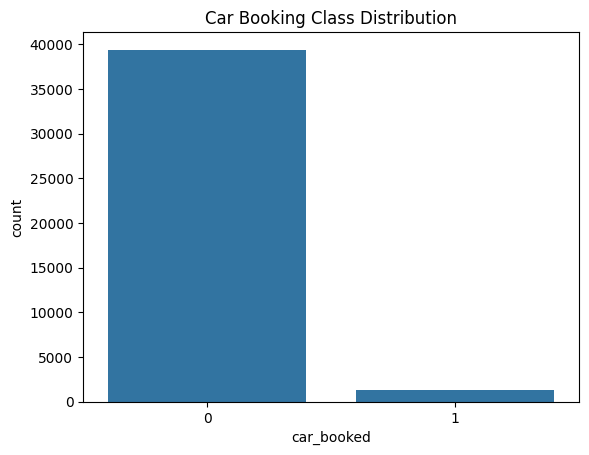

Class distribution:
 car_booked
0    0.967451
1    0.032549
Name: proportion, dtype: float64


KeyboardInterrupt: 

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, precision_recall_curve
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# Load dataset
df = pd.read_csv("D:/Make_my_trip/previous_ds/2.csv")

# Convert necessary columns to correct data types
df['user_id'] = df['user_id'].astype(np.int32)
df['travelCode'] = df['travelCode'].astype(str)

# Map bookingStatus to binary values (1 for confirmed, 0 otherwise)
df['bookingStatus'] = df['bookingStatus'].map({'Confirmed': 1, 'Pending': 0, 'Cancelled': 0}).astype(np.float32)

# Create binary target column for car bookings
df['car_booked'] = df['bookingStatus'].apply(lambda x: 1 if x == 1 else 0)

# Select relevant features
features = ['totalDistance', 'rentalDuration', 'flight_price', 'flight_duration', 'days']

# Handle missing values
df_filtered = df.copy()
df_filtered[features] = df_filtered[features].fillna(df_filtered[features].median())

# Convert to float32 before scaling
df_filtered[features] = df_filtered[features].astype(np.float32)

# Standardize features
scaler = StandardScaler()
df_filtered[features] = scaler.fit_transform(df_filtered[features])

# Define feature matrix (X) and target variable (y)
X = df_filtered[features]
y = df['car_booked']

# Check class imbalance
sns.countplot(x=y)
plt.title("Car Booking Class Distribution")
plt.show()

print("Class distribution:\n", y.value_counts(normalize=True))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize Random Forest with class weights
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [1, 2, 5],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Feature importance analysis
importances = best_rf_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
print(feature_importance.sort_values(by='Importance', ascending=False))

# Predict on the test set
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate Random Forest model
print("\nRandom Forest Results:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.2f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")

# Try XGBoost for better handling of imbalanced data
xgb_model = XGBClassifier(scale_pos_weight=len(y_train) / sum(y_train), use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predict using XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost model
print("\nXGBoost Results:")
print(f"XGBoost Precision: {precision_score(y_test, y_pred_xgb):.2f}")
print(f"XGBoost Recall: {recall_score(y_test, y_pred_xgb):.2f}")
print(f"XGBoost F1-Score: {f1_score(y_test, y_pred_xgb):.2f}")
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.2f}")

# Adjust Decision Threshold for better recall
y_probs_rf = best_rf_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs_rf)

# Pick a threshold where recall improves
optimal_threshold = thresholds[np.argmax(recalls >= 0.3)]

y_pred_new_rf = (y_probs_rf >= optimal_threshold).astype(int)

print("\nThreshold-Optimized Random Forest Results:")
print(f"New Precision: {precision_score(y_test, y_pred_new_rf):.2f}")
print(f"New Recall: {recall_score(y_test, y_pred_new_rf):.2f}")
print(f"New F1-Score: {f1_score(y_test, y_pred_new_rf):.2f}")
print(f"New Accuracy: {accuracy_score(y_test, y_pred_new_rf):.2f}")


_________________________________________________________________________________________________________________

In [88]:
from sklearn.impute import SimpleImputer

# Fill missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Apply SMOTEENN
X_res, y_res = smote_enn.fit_resample(X_train_imputed, y_train)


In [91]:
print(X_train.isnull().sum())  # Check missing values in each column


totalDistance      29477
rentalDuration     29477
flight_price           0
flight_duration        0
days                   0
dtype: int64


In [92]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'
X_train = imputer.fit_transform(X_train)


In [93]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
X_res, y_res = smote_enn.fit_resample(X_train, y_train)


Original class distribution: Counter({0: 31523, 1: 1067})
Resampled class distribution: Counter({1: 30082, 0: 29742})


d:\Make_my_trip\Recommendation\recomm\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 30082, number of negative: 29742
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1025
[LightGBM] [Info] Number of data points in the train set: 59824, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


d:\Make_my_trip\Recommendation\recomm\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Make_my_trip\Recommendation\recomm\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 30082, number of negative: 29742
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 506
[LightGBM] [Info] Number of data points in the train set: 59824, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502842 -> initscore=0.011367
[LightGBM] [Info] Start training from score 0.011367
Optimal Threshold: 0.85
Improved Precision: 0.10
Improved Recall: 0.71
Improved F1-Score: 0.17
Improved Accuracy: 0.78
Improved ROC-AUC: 0.79


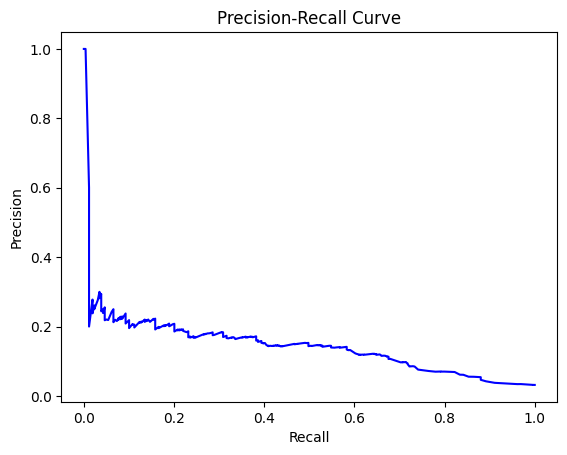

Total Execution Time: 34.50 seconds


In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTEENN
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import time

# Start timer
start_time = time.time()

# Load Data (assuming df is already loaded)
df['car_booked'] = df['bookingStatus'].apply(lambda x: 1 if x == 1 else 0)

# Feature selection
features = ['totalDistance', 'rentalDuration', 'flight_price', 'flight_duration', 'days']
X = df[features]
y = df['car_booked']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle Missing Values (Replace NaNs with Mean)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Apply SMOTE-ENN for class balancing
smote_enn = SMOTEENN(random_state=42)
X_res, y_res = smote_enn.fit_resample(X_train, y_train)

print(f"Original class distribution: {Counter(y_train)}")
print(f"Resampled class distribution: {Counter(y_res)}")

# Feature Scaling
scaler = StandardScaler()
X_res = scaler.fit_transform(X_res)
X_test = scaler.transform(X_test)

# Random Forest with Optimized Parameters (Skip Grid Search for Speed)
rf_model = RandomForestClassifier(
    n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2,
    bootstrap=False, random_state=42, class_weight='balanced', n_jobs=-1
)
rf_model.fit(X_res, y_res)

# LightGBM Classifier
lgb_model = LGBMClassifier(n_estimators=200, learning_rate=0.05, class_weight='balanced', random_state=42, n_jobs=-1)
lgb_model.fit(X_res, y_res)

# Stacking Classifier
base_models = [
    ('rf', rf_model),
    ('xgb', XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric='logloss', n_jobs=-1))
]
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=LGBMClassifier(n_jobs=-1), n_jobs=-1)
stacking_clf.fit(X_res, y_res)

# Predictions
y_probs = stacking_clf.predict_proba(X_test)[:, 1]

# Find Optimal Decision Threshold
best_threshold = 0.5
best_f1 = 0
for threshold in np.arange(0.1, 0.9, 0.05):
    y_pred_adj = (y_probs >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_adj)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Optimal Threshold: {best_threshold:.2f}")

# Apply Optimized Threshold
y_pred = (y_probs >= best_threshold).astype(int)

# Evaluate Model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)

# Print Metrics
print(f"Improved Precision: {precision:.2f}")
print(f"Improved Recall: {recall:.2f}")
print(f"Improved F1-Score: {f1:.2f}")
print(f"Improved Accuracy: {accuracy:.2f}")
print(f"Improved ROC-AUC: {roc_auc:.2f}")

# Plot Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_probs)
plt.plot(recall_vals, precision_vals, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# End timer
end_time = time.time()
print(f"Total Execution Time: {end_time - start_time:.2f} seconds")


Original class distribution: Counter({0: 31529, 1: 1061})
Resampled class distribution: Counter({0: 29809, 1: 9416})
[LightGBM] [Info] Number of positive: 9416, number of negative: 29809
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 39225, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


d:\Make_my_trip\Recommendation\recomm\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Optimal Threshold: 0.89
Final Precision: 0.35
Final Recall: 0.96
Final F1-Score: 0.51
Final Accuracy: 0.94
Final ROC-AUC: 0.97


d:\Make_my_trip\Recommendation\recomm\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


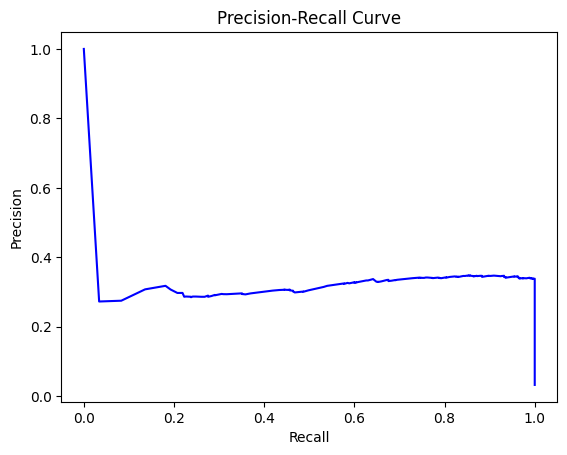

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.combine import SMOTEENN
from lightgbm import LGBMClassifier

# Load Data
df['car_booked'] = df['bookingStatus'].apply(lambda x: 1 if x == 1 else 0)

# Feature selection
features = ['totalDistance', 'rentalDuration', 'flight_price', 'flight_duration', 'days']
X = df[features]
y = df['car_booked']

# Handle Missing Values
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE-ENN with optimized resampling (~1:1.5 ratio)
smote_enn = SMOTEENN(sampling_strategy=0.35, random_state=42, n_jobs=-1)  # Adjusted from 0.7 to 0.35
X_res, y_res = smote_enn.fit_resample(X_train, y_train)

print(f"Original class distribution: {Counter(y_train)}")
print(f"Resampled class distribution: {Counter(y_res)}")

# Feature Scaling
scaler = StandardScaler()
X_res = scaler.fit_transform(X_res)
X_test = scaler.transform(X_test)

# Optimized LightGBM
lgb_model = LGBMClassifier(n_estimators=300, learning_rate=0.01, max_depth=7, num_leaves=10, 
                           min_child_samples=50, class_weight='balanced', random_state=42, n_jobs=-1)
lgb_model.fit(X_res, y_res)

# Predictions
y_probs = lgb_model.predict_proba(X_test)[:, 1]

# Find best threshold dynamically
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_probs)
f1_scores = np.nan_to_num(2 * (precision_vals * recall_vals) / (precision_vals + recall_vals))  # Avoid division errors

best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index] if len(thresholds) > 0 else 0.5  # Ensure valid threshold

print(f"Optimal Threshold: {best_threshold:.2f}")

# Apply Best Threshold
y_pred = (y_probs >= best_threshold).astype(int)

# Evaluate Model
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)

# Print Metrics
print(f"Final Precision: {precision:.2f}")
print(f"Final Recall: {recall:.2f}")
print(f"Final F1-Score: {f1:.2f}")
print(f"Final Accuracy: {accuracy:.2f}")
print(f"Final ROC-AUC: {roc_auc:.2f}")

# Plot Precision-Recall Curve
plt.plot(recall_vals, precision_vals, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [106]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_recall_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# Load Data (Replace this with your actual dataset)
X = pd.read_csv(r"D:\Make_my_trip\previous_ds\2.csv")  # Feature data
y = X.pop("target")  # Target column

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print("Original class distribution:", Counter(y_train))

# Apply SMOTEENN for balanced resampling
smote_enn = SMOTEENN(sampling_strategy=0.3, random_state=42, n_jobs=-1)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)
print("Resampled class distribution:", Counter(y_train_resampled))

# Train LightGBM Model
lgbm = LGBMClassifier(n_estimators=100, learning_rate=0.05, max_depth=7, random_state=42, n_jobs=-1)
lgbm.fit(X_train_resampled, y_train_resampled)

# Predictions & Probabilities
y_probs = lgbm.predict_proba(X_test)[:, 1]  # Get probability scores

# Find Optimal Threshold
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_probs)
f1_scores = 2 * (precision_vals * recall_vals) / (precision_vals + recall_vals)
optimal_idx = np.nanargmax(f1_scores)  # Avoid NaN errors
optimal_threshold = thresholds[optimal_idx] if optimal_idx < len(thresholds) else 0.5
print("Optimal Threshold:", round(optimal_threshold, 2))

# Convert Probabilities to Class Labels
y_pred = (y_probs >= optimal_threshold).astype(int)

# Evaluation Metrics
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)

# Print Final Scores
print(f"Final Precision: {precision:.2f}")
print(f"Final Recall: {recall:.2f}")
print(f"Final F1-Score: {f1:.2f}")
print(f"Final Accuracy: {accuracy:.2f}")
print(f"Final ROC-AUC: {roc_auc:.2f}")


KeyError: 'target'